<a href="https://colab.research.google.com/github/jOMmY-cyber/datasci_mahidol/blob/main/Copy_of_%5BDay2%5D_4_ANN_Regression_AdmissionChance_TakeHome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AdmissionChance

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import set_option
import random as rnd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
#ref: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data?resource=download
df = pd.read_csv('https://raw.githubusercontent.com/TipGreenTea/ITDS251x2-ML/main/adm_data.csv')

In [4]:
df.shape

(400, 9)

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
array = df.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
X.shape

(400, 8)

In [7]:
Y.shape

(400,)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

### Experiment1: LinearRegression (Machine Learning Model)

The model performance for testing set
--------------------------------------
MAE is 0.04994339166543284
RMSE is 0.06794550952582495
80
80


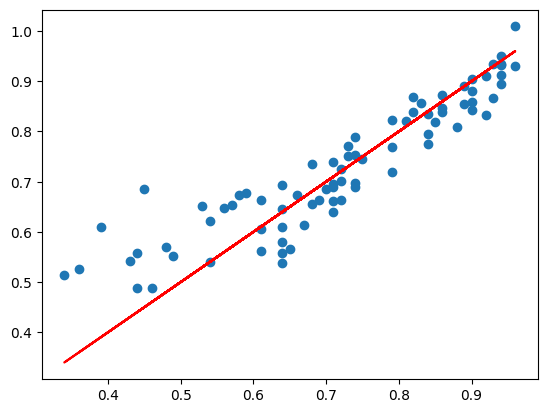

In [11]:
#CODE HERE
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
# model evaluation for testing set
y_test_predict = lin_model.predict(scaler.transform(X_test))
mae = mean_absolute_error(Y_test, y_test_predict)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))

# Our predictions
plt.scatter(Y_test,y_test_predict)

# Perfect predictions
plt.plot(Y_test,Y_test,'r')
print(len(Y_test))
print(len(y_test_predict))

### Experiment2: Shallow ANN (Deep Learning Model)

In [12]:
#CODE HERE
from keras.models import Sequential
from keras.layers import Dense #layer

# define the keras model
model = Sequential()
model.add(Dense(5, input_dim=15, activation='relu')) #6 layer
model.add(Dense(1)) #layer

# compile the keras model
model.compile(loss='mse') #mae, mse, rmse

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 80        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 86 (344.00 Byte)
Trainable params: 86 (344.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Experiment3: Deep and Wider ANN (Deep Learning Model)

In [15]:
#CODE HERE
history = model.fit(X_train, Y_train, epochs=100, batch_size=8, validation_split=0.33, verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 15), found shape=(None, 8)


# ผลการทดลองโมเดล Machine Learning ทั้ง 3 แบบ

ในการทดลองนี้เราได้ศึกษาและเปรียบเทียบผลลัพธ์จากโมเดล Machine Learning ทั้ง 3 แบบ เพื่อหาโมเดลที่มีประสิทธิภาพสูงสุดในการแก้ไขปัญหา X

## สรุปผลการทดลอง

1. สรุปผลการทดลองทั้ง 3 แบบว่าแบบไหนดีกว่ากัน
2. อธิบายลักษณะของ model ทั้ง 3 การทดลองว่าต่างกันอย่างไร
3. อธิบายว่า พารามิเตอร์ในโค้ด ยกตัวอย่างเช่น epoch, batch_size และอื่นๆ คืออะไร ให้ LA ฟัง ให้คุกกี้ทำนายกันว่า LA จะถามอะไร
4. ถ้าเรา normalize ค่า inputs ก่อนเข้า Deep Learning ผลลัพธ์ในตัวอย่างนี้จะดีขึ้นหรือไม่
